https://www.crummy.com/software/BeautifulSoup/bs4/doc/

# EJEMPLO WEB SCRAPING

In [ ]:
import requests # to obtain html data
import bs4      # beautifulsoup4 to parse the html content

Web Scraping es basicamente extraer datos de una o varias paginas web.
¿Por qué es importante? Por que la web es la mayor fuente de datos que existe.

Una cosa importante: Hay un tema legal con el web scraping.
Para saber si una página web permite que ocupes sus datos, debes leer su sección de "politicas de privacidad".


Aquí hay un ejemplo (antiguo) de las politicas de privacidad de la página camara.cl

Algunas páginas pueden bloquear el acceso temporalmente al recibir multiples solicitudes a velocidades "no humanas". (En este caso solo debes intentar de nuevo despues de esperar un rato).
Se supone que algunas páginas pueden bloquear tu ip si detectan "actividad sospechosa", eso significa que no podrás acceder más a la página. (Nunca me ha pasado, pero por estas cosas es importante leer las politicas de privacidad)

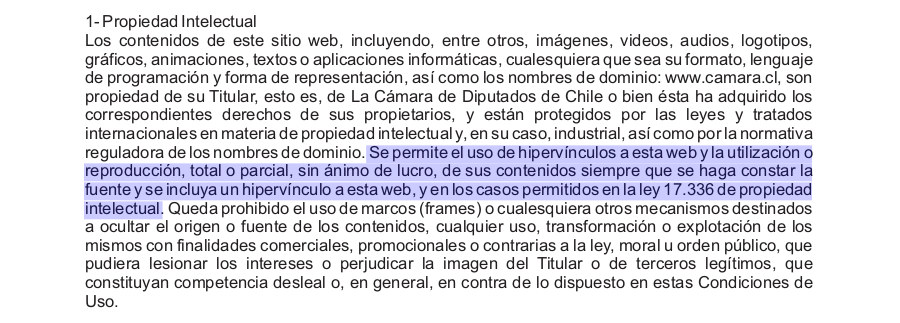

Para este ejemplo vamos a ocupar la página de la facultad de ingeniería de la Universidad de Concepción.

In [ ]:
res = requests.get('https://fi.udec.cl/pregrado/ingenieria-civil-informatica/academicos/')

Con "requests" accedemos al contenido de la página. Como una página web es un archivo html, obtenemos el html como texto plano.

In [ ]:
res.text

'<!DOCTYPE html>\r\n<!--[if IE 6]>\r\n<html id="ie6" lang="es">\r\n<![endif]-->\r\n<!--[if IE 7]>\r\n<html id="ie7" lang="es">\r\n<![endif]-->\r\n<!--[if IE 8]>\r\n<html id="ie8" lang="es">\r\n<![endif]-->\r\n<!--[if !(IE 6) | !(IE 7) | !(IE 8)  ]><!-->\r\n<html lang="es">\r\n<!--<![endif]-->\r\n<head>\r\n\t<meta charset="UTF-8" />\r\n\t\t\t\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\t<link rel="pingback" href="https://fi.udec.cl/xmlrpc.php" />\r\n\r\n\t\t<!--[if lt IE 9]>\r\n\t<script src="https://fi.udec.cl/wp-content/themes/Divi/js/html5.js" type="text/javascript"></script>\r\n\t<![endif]-->\r\n\r\n\t<script type="text/javascript">\r\n\t\tdocument.documentElement.className = \'js\';\r\n\t</script>\r\n\r\n\t\n\t<!-- This site is optimized with the Yoast SEO plugin v15.5 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<title>Académicos - Facultad de Ingeniería UdeC</title>\n\t<meta name="robots" content="index, follow, max-snippet:-1, max-image-preview:large, max

Puede ver todo el contenido html (como texto sin formato) asociado con la solicitud. Para analizar y extraer información de este documento, utilizaremos BeautifulSoup.
Usando el método bs4.BeautifulSoup(text, struct_of_data) podemos inicializar un objeto que nos permita solicitar y trabajar con todas las herramientas que nos da beatigulsoup. El 'xlml' es una biblioteca fácil de usar para procesar XML y HTML en Python.

In [ ]:
soup = bs4.BeautifulSoup(res.text, 'lxml')

Es importante conocer la sintaxis HTML. Para explorar la estructura necesitamos inspeccionar la página web utilizando las herramientas del navegador. Una forma directa es seleccionar el elemento con el botón derecho y hacer clic en inspeccionar.
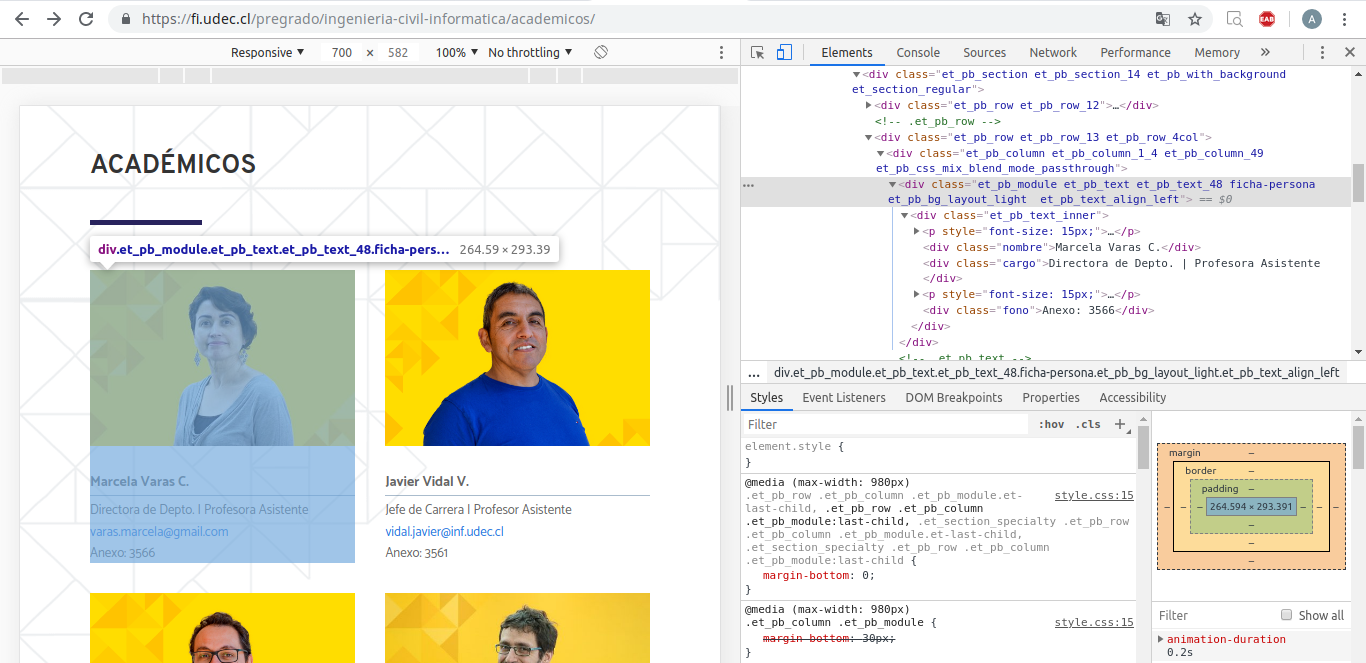

Ahora podemos seleccionar todo (en las etiquetas html) que necesitamos. Por ejemplo podemos seleccionar la sección **ficha-persona**. La función de selección devuelve una lista de objetos que coinciden con la palabra clave ingresada. Usamos ```.``` para referirnos a **nombres de clase** y ```#``` para **ids**

Notamos que el bloque que queremos tiene **class = "et_pb_module et_pb_text et_pb_text_48 ficha-persona et_pb_bg_layout_light et_pb_text_align_left"**.

El bloque hereda de distintas clases, aqui cada palabra separa por un " " (Espacio en blanco) es una clase. Lo más probable es que las clases que contengan las palabras "text" o "module" o "layout" se usen en otros bloques que contengan información que no nos interesa, por lo que la clase que nos sirve es la **"ficha- persona"**


In [ ]:
table = soup.select('.ficha-persona') # From the HTML we selected the class name "ficha-persona"
print(table)

[<div class="et_pb_module et_pb_text et_pb_text_25 ficha-persona et_pb_bg_layout_light et_pb_text_align_left">
<div class="et_pb_text_inner">
<p><a href="https://fi.udec.cl/academicos/marcela-varas-c/"><img alt="Marcela Varas" class="aligncenter size-full wp-image-7568" height="330" loading="lazy" src="https://fi.udec.cl/wp-content/uploads/2019/01/Marcela-Varas.jpg" title="Marcela Varas" width="495"/></a></p>
<div class="nombre">Marcela Varas C.</div>
<div class="cargo"><strong>Directora de Depto.</strong> | Profesora Asistente</div>
<p><a class="mail" href="mailto:mvaras@udec.cl">mvaras@udec.cl</a></p>
<div class="fono">Anexo: 3566</div>
</div>
</div>, <div class="et_pb_module et_pb_text et_pb_text_26 ficha-persona et_pb_bg_layout_light et_pb_text_align_left">
<div class="et_pb_text_inner">
<p><a href="https://fi.udec.cl/academicos/javier-vidal-v/"><img alt="" class="size-full wp-image-15836 aligncenter" height="330" loading="lazy" src="https://fi.udec.cl/wp-content/uploads/2019/01/Ja

In [ ]:
#Es una lista y contiene a todos los academicos de la página
#Para mostrar el primero debemos acceder a la posición 0
print(table[0])

<div class="et_pb_module et_pb_text et_pb_text_25 ficha-persona et_pb_bg_layout_light et_pb_text_align_left">
<div class="et_pb_text_inner">
<p><a href="https://fi.udec.cl/academicos/marcela-varas-c/"><img alt="Marcela Varas" class="aligncenter size-full wp-image-7568" height="330" loading="lazy" src="https://fi.udec.cl/wp-content/uploads/2019/01/Marcela-Varas.jpg" title="Marcela Varas" width="495"/></a></p>
<div class="nombre">Marcela Varas C.</div>
<div class="cargo"><strong>Directora de Depto.</strong> | Profesora Asistente</div>
<p><a class="mail" href="mailto:mvaras@udec.cl">mvaras@udec.cl</a></p>
<div class="fono">Anexo: 3566</div>
</div>
</div>


Alternativamente, podríamos obtener información de las etiquetas accediendo al atributo de sopa. Si selecciona un objeto HTML específico (sin lista, como vimos anteriormente). Puedes limpiar etiquetas para recuperar el texto: debemos usar el método ```.getText()``` o el atributo ```.text```

In [ ]:
print(table[0].text)
print('*'*20)

#Puedo moverme entre tags ocupando .
print(table[0].p)
print('*'*20)
print(table[0].p.a)
print('*'*20)
print(table[0].p.a.img)




Marcela Varas C.
Directora de Depto. | Profesora Asistente
mvaras@udec.cl
Anexo: 3566


********************
<p><a href="https://fi.udec.cl/academicos/marcela-varas-c/"><img alt="Marcela Varas" class="aligncenter size-full wp-image-7568" height="330" loading="lazy" src="https://fi.udec.cl/wp-content/uploads/2019/01/Marcela-Varas.jpg" title="Marcela Varas" width="495"/></a></p>
********************
<a href="https://fi.udec.cl/academicos/marcela-varas-c/"><img alt="Marcela Varas" class="aligncenter size-full wp-image-7568" height="330" loading="lazy" src="https://fi.udec.cl/wp-content/uploads/2019/01/Marcela-Varas.jpg" title="Marcela Varas" width="495"/></a>
********************
<img alt="Marcela Varas" class="aligncenter size-full wp-image-7568" height="330" loading="lazy" src="https://fi.udec.cl/wp-content/uploads/2019/01/Marcela-Varas.jpg" title="Marcela Varas" width="495"/>


Revise la documentación de la libreria BeautifulSoup

### Extracción de datos

El método ```find_all()``` escanea todo el documento en busca de resultados, pero

1. Elemento de la lista
2. Elemento de la lista

a veces solo quieres encontrar un resultado; en esos casos es conveniente utilizar el método ```find()```

In [ ]:
table = soup.find('div', attrs={'class': 'ficha-persona'}) # me encuentra el primero
print(type(table))
print(table)

<class 'bs4.element.Tag'>
<div class="et_pb_module et_pb_text et_pb_text_25 ficha-persona et_pb_bg_layout_light et_pb_text_align_left">
<div class="et_pb_text_inner">
<p><a href="https://fi.udec.cl/academicos/marcela-varas-c/"><img alt="Marcela Varas" class="aligncenter size-full wp-image-7568" height="330" loading="lazy" src="https://fi.udec.cl/wp-content/uploads/2019/01/Marcela-Varas.jpg" title="Marcela Varas" width="495"/></a></p>
<div class="nombre">Marcela Varas C.</div>
<div class="cargo"><strong>Directora de Depto.</strong> | Profesora Asistente</div>
<p><a class="mail" href="mailto:mvaras@udec.cl">mvaras@udec.cl</a></p>
<div class="fono">Anexo: 3566</div>
</div>
</div>


Ahora podemos iterar sobre los elementos de la tabla.
![a](./images/tablehtml.png)

In [ ]:
for bar in soup.find_all('div', attrs={'class': 'ficha-persona'}): #me encuentra todos
  nombre = bar.find('div', attrs={'class': 'nombre'}).text
  email = bar.find('a', attrs={'class': 'mail'}).text
  print(nombre,email)
  print('-'*20)

Marcela Varas C. mvaras@udec.cl
--------------------
Javier Vidal V. jvidal@udec.cl
--------------------
Roberto Asín A. rasin@udec.cl
--------------------
Guillermo Cabrera V. guillecabrera@udec.cl
--------------------
Pierluigi Cerulo. piercerulo@udec.cl
--------------------
Ricardo Contreras A. rcontrer@udec.cl
--------------------
José Sebastián Fuentes S. jfuentess@udec.cl
--------------------
Julio Godoy Del C. jugodoy@udec.cl
--------------------
Cecilia Hernández R. cecihernandez@udec.cl
--------------------
Zheng Li zli@udec.cl
--------------------
Jorge López R. jorlopez@udec.cl
--------------------
Eduardo Méndez O. emendez@udec.cl
--------------------
Pedro Pinacho D. ppinacho@udec.cl
--------------------
Andrea Rodríguez T. andrea@udec.cl
--------------------
Gonzalo Rojas D. gonzalorojas@udec.cl
--------------------
Lilian Salinas A. lilisalinas@udec.cl
--------------------
Diego Seco N. dseco@udec.cl
--------------------


### Formatting pandas tables

Pondremos los datos de los profesores en una tabla ocupando la libreria Pandas. Para esto primero debemos definir que datos son los que vamos a ocupar.

Tenemos los campos de : Nombre, Rol, Email y Anexo. Es importante destacar que hay profesores que tienen 2 roles, por lo que el campo "Rol" se transforma en "Rol 1" y "Rol 2"

In [ ]:
import pandas as pd

In [ ]:
headers = ["Nombre", "Rol 1", "Rol 2", "Email", "Anexo"]
headers

['Nombre', 'Rol 1', 'Rol 2', 'Email', 'Anexo']

In [ ]:
#Modifiquemos el código de antes para guardar los atributos
nombres = [] #lista vacia en donde guardaremos los nombres
rol1 = []
rol2 = []
emails = []
anexos = []

for bar in soup.find_all('div', attrs={'class': 'ficha-persona'}): #me encuentra todos
  nombres.append(bar.find('div', attrs={'class': 'nombre'}).text)
  cargo = bar.find('div', attrs={'class': 'cargo'}).text
  #Si un profesor tiene 2 cargos, el simbolo '|' los separa.
  doble = cargo.find('|') #buscamos el simbolo '|' en el string
  if(doble!=-1): #si posee dos roles
    rol1.append(cargo[0:doble-1])
    rol2.append(cargo[doble+1:])
  else: #si no posee 2 roles
    rol1.append(cargo)
    rol2.append(float("NAN"))
  emails.append(bar.find('a', attrs={'class': 'mail'}).text)
  if(bar.find('div', attrs={'class': 'fono'})):
    anexos.append(bar.find('div', attrs={'class': 'fono'}).text)
  else:
    anexos.append(float("NAN"))
academicos= [nombres,rol1,rol2,emails,anexos]

In [ ]:
new_table = pd.DataFrame()
for i in range(len(headers)):
    new_table[headers[i]] = academicos[i]

In [ ]:
new_table = pd.DataFrame({"Nombre":nombres,"Rol 1":rol1,"Rol 2":rol2,"Email":emails,"Anexo":anexos})

In [ ]:
new_table.head(10)

,Nombre,Rol 1,Rol 2,Email,Anexo
0,Marcela Varas C.,Directora de Depto.,Profesora Asistente,mvaras@udec.cl,Anexo: 3566
1,Javier Vidal V.,Jefe de Carrera,Profesor Asistente,jvidal@udec.cl,Anexo: 3561
2,Roberto Asín A.,Director Magíster en Ciencias de la Computació...,NaN,rasin@udec.cl,Anexo: 3573
3,Guillermo Cabrera V.,Director Magíster en Ciencias de Datos para la...,NaN,guillecabrera@udec.cl,Anexo: 3572
4,Pierluigi Cerulo.,Director Doctorado en Ciencias de la Computaci...,NaN,piercerulo@udec.cl,NaN
5,Ricardo Contreras A.,Profesor Asociado,NaN,rcontrer@udec.cl,Anexo: 3570
6,José Sebastián Fuentes S.,Profesor Asistente,NaN,jfuentess@udec.cl,Anexo: 3569
7,Julio Godoy Del C.,Profesor Asistente,NaN,jugodoy@udec.cl,Anexo: 3574
8,Cecilia Hernández R.,Profesora Asistente,NaN,cecihernandez@udec.cl,Anexo: 3568
9,Zheng Li,Profesor Asistente,NaN,zli@udec.cl,Anexo: 3686
